Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

Load the dataset

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

Exploratory data analysis

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
len(x_test)

10000

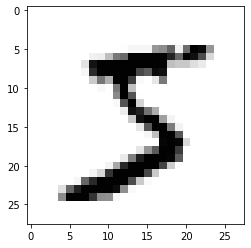

In [6]:
plt.imshow(x_train[0],cmap='Greys')

In [7]:
x_train[0].max()

255

In [8]:
y_train[0]

5

Data preprocessing

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0].max()

1.0

In [11]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
y_cat_train = tf.keras.utils.to_categorical(y_train)
y_cat_test = tf.keras.utils.to_categorical(y_test)

In [14]:
y_cat_train.shape

(60000, 10)

Build the model

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train, val_x, y_train, val_y = train_test_split(x_train, y_cat_train, test_size=0.3, random_state=42)

In [17]:
val_x.shape

(18000, 28, 28, 1)

In [18]:
x_train.shape

(42000, 28, 28, 1)

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [22]:
model.fit(x_train,y_train,epochs=15,callbacks=[early_stop],validation_data=(val_x,val_y))

Epoch 1/15
1313/1313 [==============================] - 91s 67ms/step - loss: 0.2655 - accuracy: 0.9207 - val_loss: 0.0824 - val_accuracy: 0.9751
Epoch 2/15
1313/1313 [==============================] - 74s 56ms/step - loss: 0.1039 - accuracy: 0.9698 - val_loss: 0.0558 - val_accuracy: 0.9836
Epoch 3/15
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 4/15
1313/1313 [==============================] - 64s 49ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0467 - val_accuracy: 0.9860
Epoch 5/15
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0473 - val_accuracy: 0.9868
Epoch 6/15
1313/1313 [==============================] - 118s 90ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0478 - val_accuracy: 0.9873


Evaluate the model

In [23]:
metrics = pd.DataFrame(model.history.history)

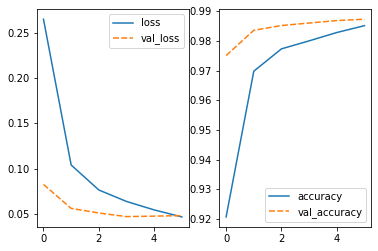

In [24]:
fig, ax = plt.subplots(1,2)
sns.lineplot(data=metrics[['loss','val_loss']],ax=ax[0])
sns.lineplot(data=metrics[['accuracy','val_accuracy']],ax=ax[1])
plt.show()

In [25]:
print(f"Train accuracy: {model.evaluate(x_train,y_train,verbose=False)}")
print(f"Validation accuracy: {model.evaluate(val_x,val_y,verbose=False)}")
print(f"Test accuracy: {model.evaluate(x_test,y_cat_test,verbose=False)}")

Train accuracy: [0.022627882659435272, 0.9930238127708435]
Validation accuracy: [0.04674264416098595, 0.9860000014305115]
Test accuracy: [0.03916337713599205, 0.9868000149726868]


In [26]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 6s 18ms/step


In [27]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
print(sklearn.metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

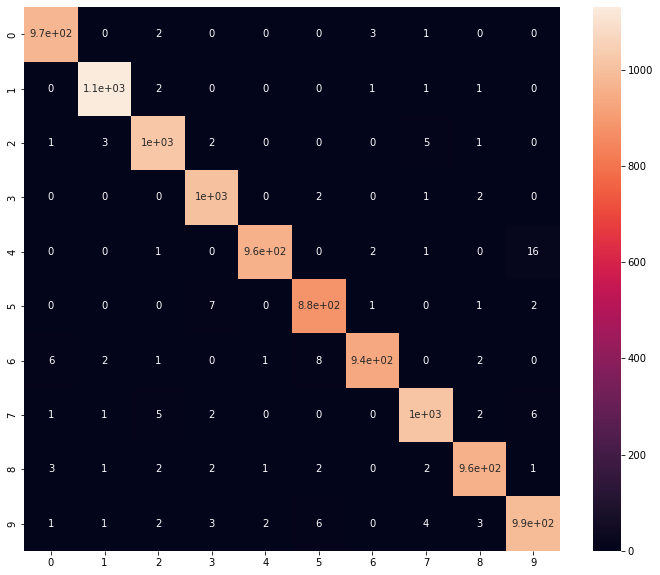

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test,predictions),annot=True)

Make predictions

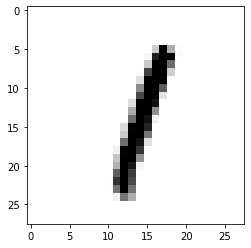

In [30]:
test_item_index = 5
test_item = x_test[test_item_index]
plt.imshow(test_item,cmap='Greys')

In [31]:
np.argmax(model.predict(test_item.reshape(1,28,28,1)),axis=1) 

1/1 [==============================] - 0s 88ms/step


array([1])

In [32]:
y_test[test_item_index]

1